# K means Clustering

Instructor: Laura G. Funderburk

Material adapted from Machine Learning with Python by Dr. Tirthajyoti Sarkar, Fremont, California ([GitHub repo](https://github.com/tirthajyoti/Machine-Learning-with-Python)).

## Lesson overview

1. What is K Means clustering?

2. How does the algorithm work?

3. Working example: college data

- Exploratory data analysis

- Cluster creation

- Evaluation

- Clustering performance

----------------------

## What is K means clustering?

The $K$ -means algorithm divides a set of $N$ samples $X$ into $K$ disjoint clusters $C$. 

Each cluster $C$ is described by the mean of the samples in the cluster. 

The means are commonly called *cluster centroids*.

![cluster](./cluster.png)

## How does the algorithm work?

- Iterative refinement to produce final result. 
- Inputs: number of clusters $K$ and data (collection of features for each data point)
- Initial estimates for the $K$ centroids (randomly generated or randomly selected)

#### The algorithm then iterates over the following two steps until a stopping criteria is met. 

1. Data assignment step: each centroid defines one of the clusters. Each data point is assigned to its nearest centroid (squared Euclidean distance).

Let $c_i$ be a collection of centroids in a set $C$. Then each data point is assigned to a cluster based on

$$\text{arg} _{c_i \in C} \text{ min} \text{ dist}(c_i, x)^2$$

2. Centroid update step: centroids are recomputed. Take the mean of all data points assigned to that centroid's cluster. 

$$c_i = \frac{1}{|S_i|} \sum _{x_i \in S_i x_i}$$

![](https://camo.githubusercontent.com/b7f879c476ba58cf442830fd55861cd4368918bc00d1531ec81eb081d279002e/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f652f65612f4b2d6d65616e735f636f6e76657267656e63652e676966)

## Working example: college data.

Let's use KMeans to cluster universities into two groups: public and private universities. 

The dataset contains 777 observations:

| Field name | Definition| Field Name | Definition |
|-|-|-|-|
|Private| Yes or no, depending on whether school is private| Apps | Number of applications received|
|Accept| Number of applications accepted| Enroll | Number of new enrolled students|
|Top10perc| Percentage of new students from top 10% of HS class| Top25perc | Percentage of new students from top 25% of HS class|
|F.Undergrad |  Number of fulltime undergraduates | P.Undergrad | Number of part time undergraduates|
|Outstate | Out-of-state tuition | Room.Board | Room and board costs|
|Books| Estimated book costs | Personal| Estimated personal spending |
| PhD | Pct. of faculty with Ph.D.’s | Terminal | Pct. of faculty with terminal degree | 
|S.F.Ratio | Student/faculty ratio | perc.alumni | Pct. alumni who donate |
| Expend |  Instructional expenditure per student | Grad.Rate |  Graduation rate | 

## Exploratory data analysis

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [122]:
college_df = pd.read_csv('College_Data',index_col=0)
college_df_reset = college_df.reset_index().rename(columns={"index":"school"})

In [31]:
college_df.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [5]:
college_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [25]:
college_df.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


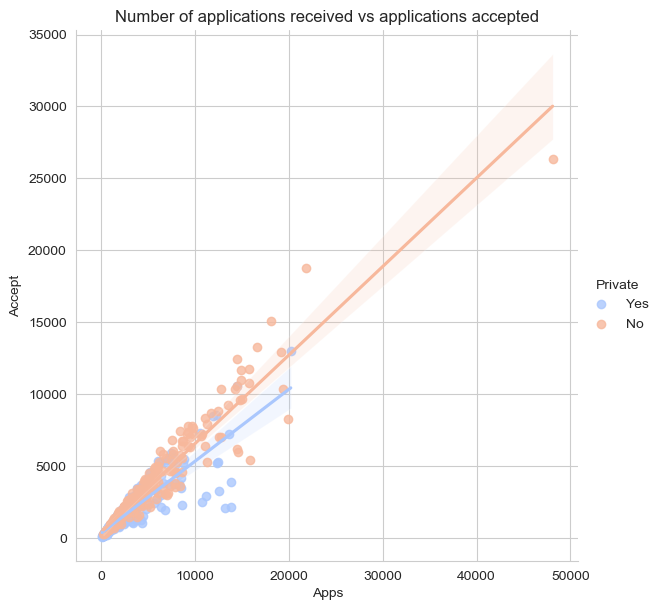

In [13]:
# Set the seaborn style
sns.set_style('whitegrid')

# Generate a scatter plot with regression line
sns.lmplot('Apps','Accept',data=college_df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)
plt.title("Number of applications received vs applications accepted")
plt.show()


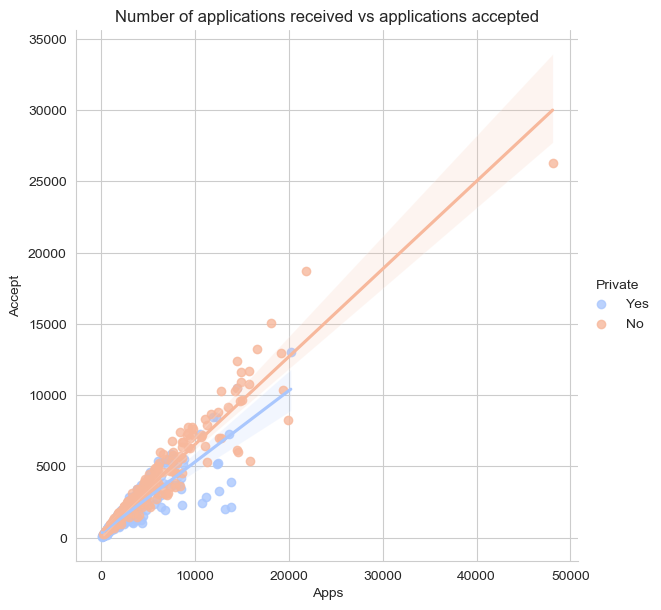

In [37]:
# Set the seaborn style
sns.set_style('whitegrid')

# Generate a scatter plot with regression line
sns.lmplot('Apps','Accept',data=college_df_reset, hue="Private",
           palette='coolwarm',height=6,aspect=1,fit_reg=True)
plt.title("Number of applications received vs applications accepted")
plt.show()


In [41]:
# What school had such a high number of applications?
college_df_reset[college_df_reset['Apps']>30000]

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
483,Rutgers at New Brunswick,No,48094,26330,4520,36,79,21401,3712,7410,4748,690,2009,90,95,19.5,19,10474,77


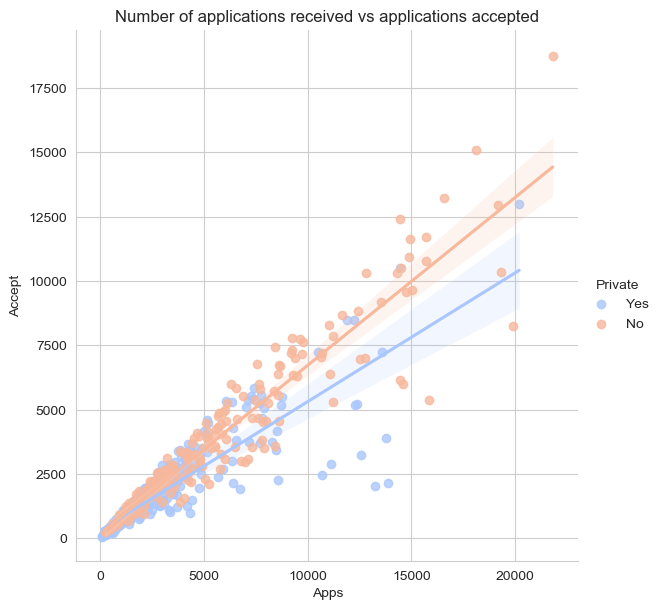

In [44]:
# Removing Rutgets at New Brunswick
sns.set_style('whitegrid')

# Generate a scatter plot with regression line
sns.lmplot('Apps','Accept',
           data=college_df_reset[college_df_reset['Apps']<30000], 
           hue="Private",
           palette='coolwarm',height=6,aspect=1,fit_reg=True)
plt.title("Number of applications received vs applications accepted")
plt.show()


In [46]:
# What school had higher number of accepted applications
college_df_reset['AcceptRate'] = college_df_reset['Accept']/college_df_reset['Apps']*100

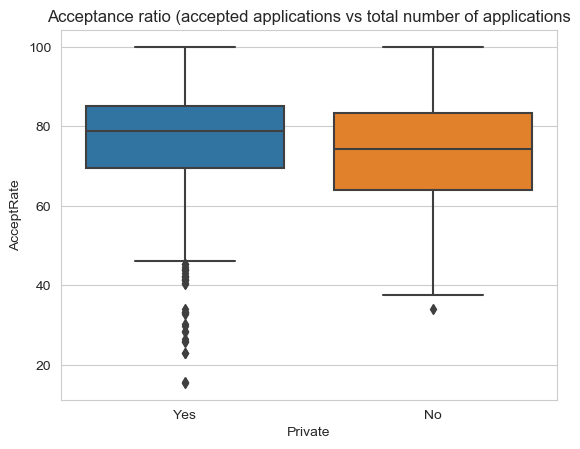

In [51]:
sns.boxplot(x='Private',y='AcceptRate',data=college_df_reset)
plt.title("Acceptance ratio (accepted applications vs total number of applications")
plt.show()


##### Insights: the plot suggests that, on average, private universities have a higher acceptance ratio than non-private universities. 

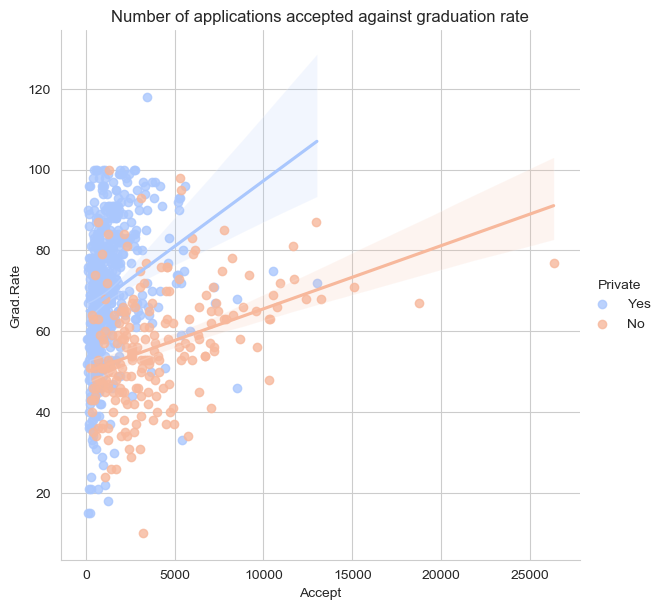

In [14]:
sns.set_style('whitegrid')
# Generate a scatter plot with regression line
sns.lmplot('Accept','Grad.Rate',data=college_df, hue='Private',
           palette='coolwarm',height=6,aspect=1,fit_reg=True)
plt.title("Number of applications accepted against graduation rate")
plt.show()

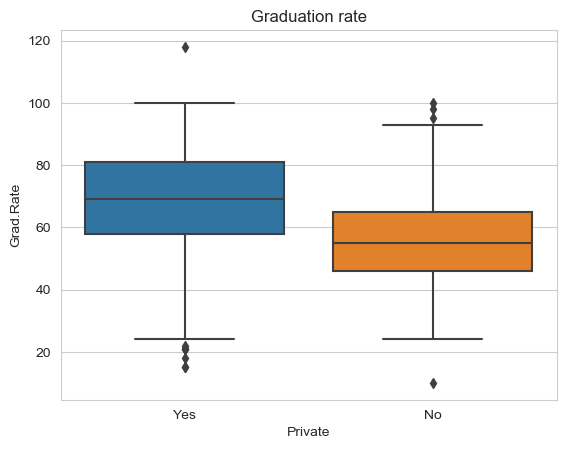

In [59]:
# Graduation rate by group
sns.boxplot(x='Private',y='Grad.Rate',data=college_df_reset)
plt.title("Graduation rate")
plt.show()

In [53]:
# What school has over 100% graduation rate?
college_df_reset[college_df_reset['Grad.Rate']>100]

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,AcceptRate
95,Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118,89.238368


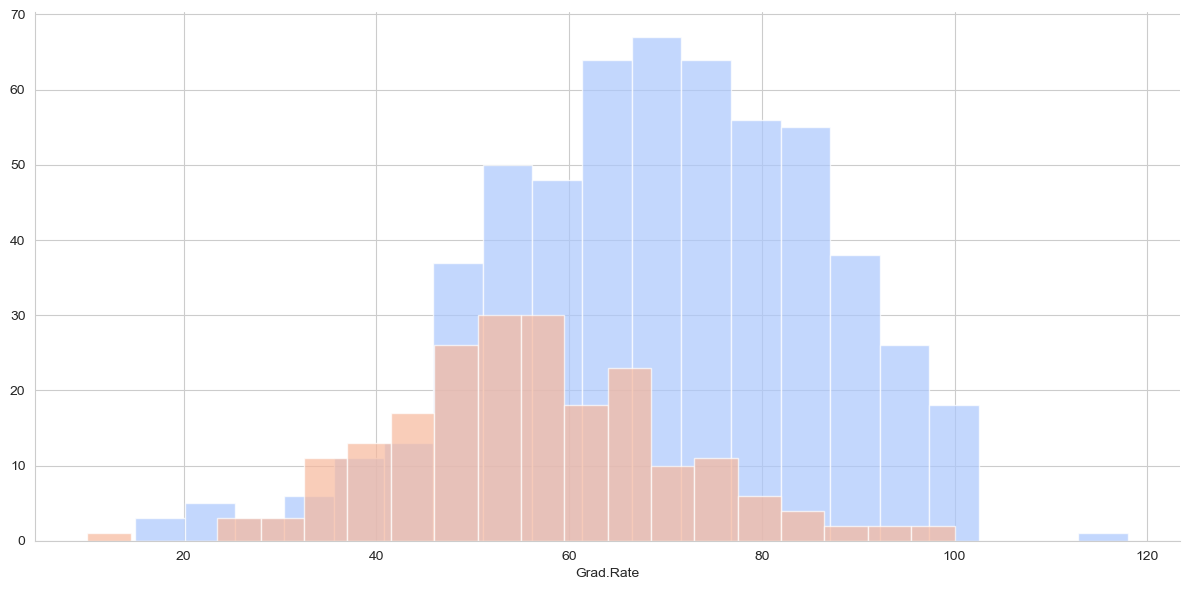

In [60]:
# Distribution of graduation rate by group
g = sns.FacetGrid(college_df_reset,
                  hue="Private",
                  palette='coolwarm',
                  height=6,aspect=2)
g = g.map(plt.hist,'Grad.Rate',bins=20,alpha=0.7)

##### Insights: the plot suggests that, on average, private universities have a higher graduation ratio than non-private universities. It's suspicious that one university has 118% graduation rate.

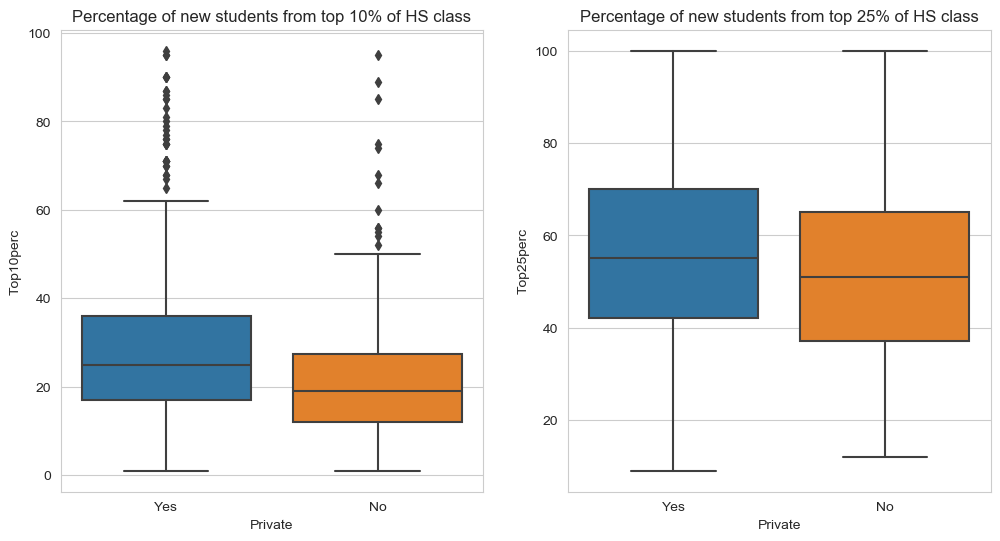

In [17]:
sns.set_style('whitegrid')

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First subplot - Top 10 percent
sns.boxplot(x='Private', y='Top10perc', data=college_df, ax=axs[0])
axs[0].set_title("Percentage of new students from top 10% of HS class")

# Second subplot - Top 25 percent
sns.boxplot(x='Private', y='Top25perc', data=college_df, ax=axs[1])
axs[1].set_title("Percentage of new students from top 25% of HS class")

# Show the plot
plt.show()

#### Exercise: 

Explore more pairs of variables to study their differences. 

Expend vs Personal
PhD vs Terminal


## K Means cluster creation

Let's initialize K means clustering using 2 clusters. We chose 2 clusters as a starting point (two types of schools). 

In [118]:
def converter(cluster):
    """
    We will use this function to assign 
    1 if school is private, and 0 otherwise
    """
    if cluster=='Yes':
        return 1
    else:
        return 0
    
# Create a copy of data frame so that original data frame does not get 
# 'corrupted' with the cluster index
college_df_copy=college_df.copy() 
college_df_copy['Group'] = college_df_copy['Private'].apply(converter)

college_df_copy.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate,Group
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [119]:
## Using 2 clusters

kmeans = KMeans(n_clusters=2, 
                init='k-means++', 
                n_init=10, 
                max_iter=300, 
                tol=0.0001, 
                verbose=0, 
                random_state=None, 
                copy_x=True, 
                algorithm='auto')

kmeans.fit(college_df_copy.drop('Private',axis=1))



KMeans(n_clusters=2)

## Evaluation

In [120]:
print(confusion_matrix(college_df_copy['Group'],kmeans.labels_))
print(classification_report(college_df_copy['Group'],kmeans.labels_))

[[138  74]
 [531  34]]
              precision    recall  f1-score   support

           0       0.21      0.65      0.31       212
           1       0.31      0.06      0.10       565

    accuracy                           0.22       777
   macro avg       0.26      0.36      0.21       777
weighted avg       0.29      0.22      0.16       777



## Further exploration - the Elbow method and the Silhouette Method

The first method looks at the sum-of-squares error in each cluster against $K$. We compute the distance from each data point to the center of the cluster (centroid) to which the data point was assigned. 

$$SS = \sum_k \sum_{x_i \in C_k} \sum_{x_j \in C_k} \left( x_i - x_j \right)^2 = \sum_k \sum_{x_i \in C_k} \left( x_i - \mu_k \right)^2$$

where $x_i$ is a point, $C_k$ represents cluster $k$ and $\mu_k$ is the centroid for cluster $k$. We can plot SS vs. $K$ and choose the *elbow point* in the plot as the best value for $K$. The elbow point is the point at which the plot starts descending much more slowly. 

In [113]:
# Initialize KMeans instance
def generate_elbow_chart(data: tuple, k_range=range(2,11)) -> None:
    """
    Plots 'SS' vs. 'K' so the user can pick an optimal 'K' based on 
    the elbow sum-of-squares method
    
    Parameters:
    -----------
        data (tuple) contains numerical values that will be used when 
        fitting to the model k_range (list) contains possible 
        number of clusters
    """
    ss = []
    
    # perform for the given k-range
    for k in k_range:
        
        # get the clustering algorithm
        kmeans = KMeans(n_clusters=k, 
                                init='k-means++', 
                                n_init=10, 
                                max_iter=300, 
                                tol=0.0001, 
                                verbose=0, 
                                random_state=None, 
                                copy_x=True, 
                                algorithm='auto')
        
        # fit to the data
        kmeans.fit(data)
        
        ss.append(kmeans.inertia_)
        
    # show the plot 
    plt.plot(k_range, ss)
    plt.xlabel("K")
    plt.ylabel("SS")
    plt.title("Elbow Method")
    plt.show()
    

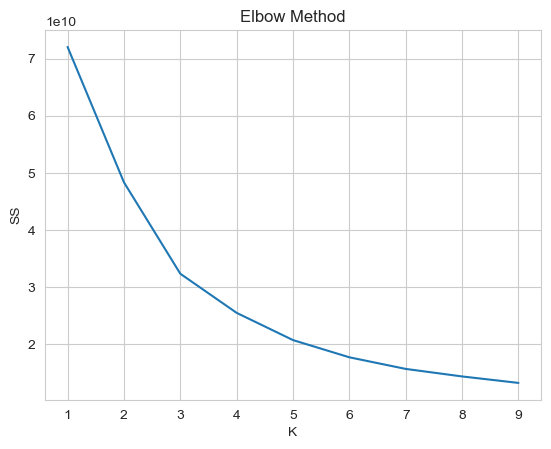

In [124]:
x_cols = np.array(college_df_copy.drop('Private',axis=1).values)
generate_elbow_chart(x_cols, k_range=range(1, 10))


There exists another method that measures how well each datapoint $x_i$ "fits" its assigned cluster *and also* how poorly it fits into other clusters. This is a different way of looking at the same objective. Denote $a_{x_i}$ as the *average* distance from $x_i$ to all other points within its own cluster $k$. The lower the value, the better. On the other hand $b_{x_i}$ is the minimum average distance from $x_i$ to points in a different cluster, minimized over clusters. That is, compute separately for each cluster the average distance from $x_i$ to the points within that cluster, and then take the minimum. The silhouette $s(x_i)$ is defined as

$$s(x_i) = \frac{b_{x_i} - a_{x_i}}{\max{\left( a_{x_i}, b_{x_i}\right)}}$$

The silhouette score is computed on *every datapoint in every cluster*. The silhouette score ranges from -1 (a poor clustering) to +1 (a very dense clustering) with 0 denoting the situation where clusters overlap. Some criteria for the silhouette coefficient is provided in the table below.

For n_clusters = 2 The average silhouette_score is : 0.5599267811400582
For n_clusters = 3 The average silhouette_score is : 0.4759356715031701


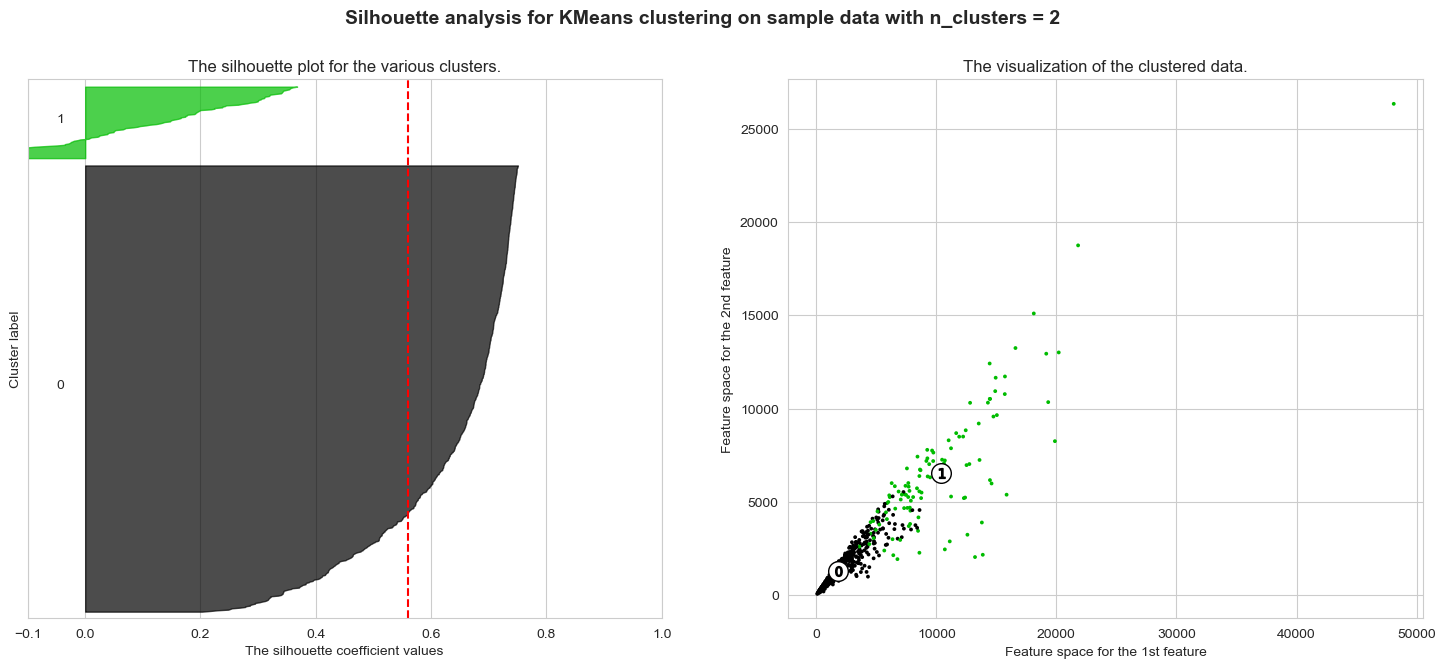

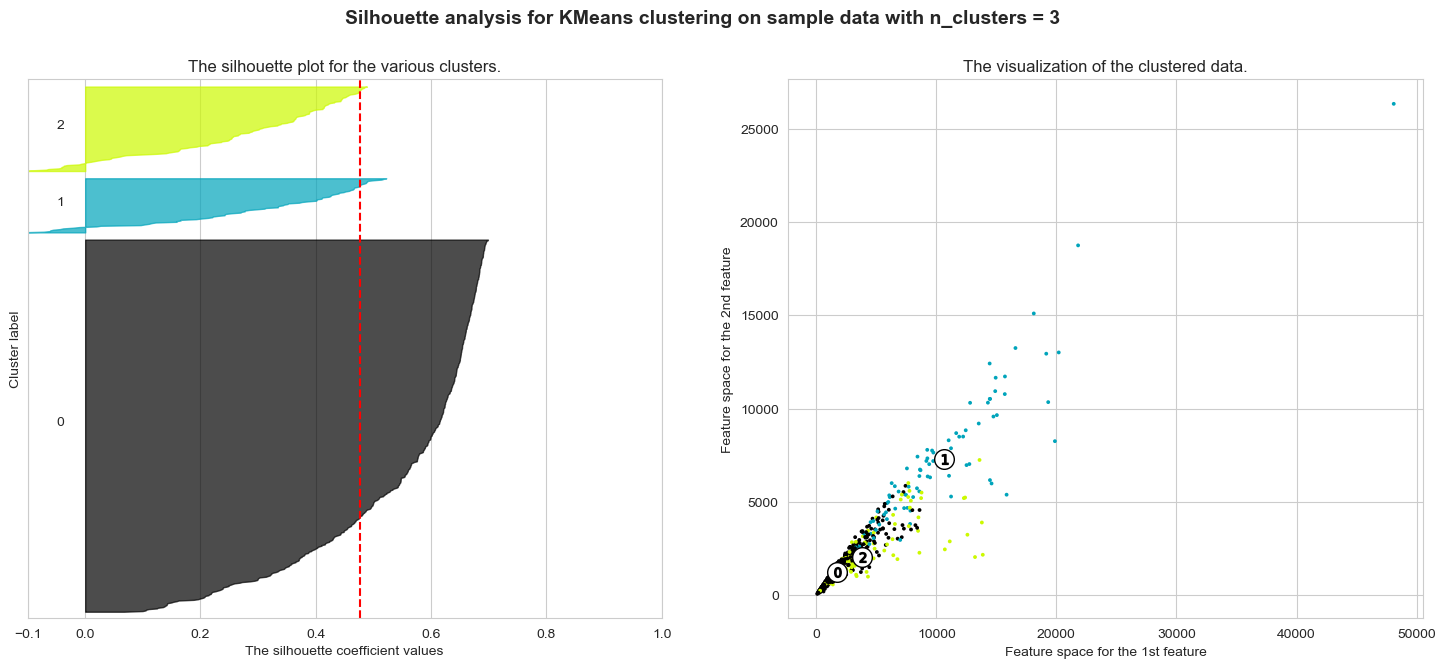

In [131]:
range_n_clusters = range(2,4)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(x_cols) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, 
                        init='k-means++', 
                        n_init=10, 
                        max_iter=300, 
                        tol=0.0001, 
                        verbose=0, 
                        random_state=42, 
                        copy_x=True, 
                        algorithm='auto')
    cluster_labels = clusterer.fit_predict(x_cols)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(x_cols, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(x_cols, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        x_cols[:, 0], x_cols[:, 1], marker=".", s=30, lw=0, alpha=1, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()